# Principal Component Analysis

We have two datasets: three.txt and eight.txt. Each has 200 handwritten digits. Each line is for a digit, vectorized from a 16x16 gray scale image. We will use PCA for dimension reduction.

First we will use manual PCA. So we can see how PCA works step by step.
Then we will do PCA with scikit-learn.

# Manual PCA

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [95]:
def visualization_savefig(mat, figname, title):
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    ax.set_axis_off()
    ax.set_title(title, usetex=True)
    plt.colorbar(im)
    fig.savefig(figname)
    plt.show()

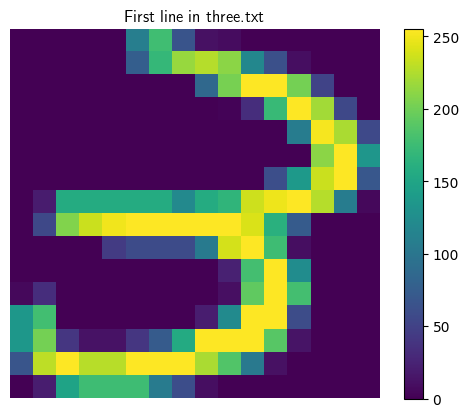

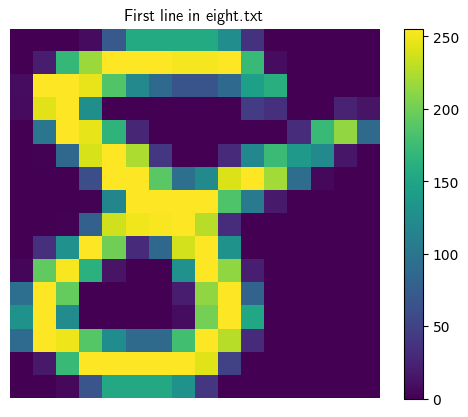

In [96]:
# part (a)
three = pd.read_csv('three.txt', delimiter=' ', header=None)
three.drop(three.columns[256],axis=1, inplace=True)
line = 0
three_line1 = np.array(three.iloc[line, :])
visualization_savefig(three_line1.reshape([16, 16], order='F'), "fig1a_three.pdf", "First line in three.txt")

eight = pd.read_csv('eight.txt', delimiter=' ', header=None)
eight.drop(eight.columns[256],axis=1, inplace=True)
eight_line1 = np.array(eight.iloc[line, :])
visualization_savefig(eight_line1.reshape([16, 16], order='F'), "fig1b_eight.pdf", "First line in eight.txt")

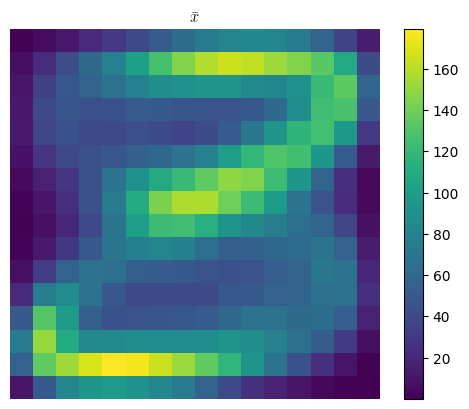

In [97]:
# part (b)
x = np.vstack((np.array(three), np.array(eight)))
x_bar = x.mean(axis=0)
visualization_savefig(x_bar.reshape([16, 16], order='F'), "fig2_x_bar.pdf", r"$\bar{x}$")

In [98]:
# part (c)
# center X using x_bar and calculate the covariance matrix
x_centered = x - x_bar
n = x_centered.shape[0]
S = np.matmul(x_centered.transpose(), x_centered) / (n-1)
print("5x5 submatrix of the covariance matrix: \n%s" %np.round(S[:5, :5], 3))

5x5 submatrix of the covariance matrix: 
[[  59.167  142.149   28.682   -7.179  -14.336]
 [ 142.149  878.939  374.137   24.128  -87.128]
 [  28.682  374.137 1082.906  555.227   33.724]
 [  -7.179   24.128  555.227 1181.244  777.772]
 [ -14.336  -87.128   33.724  777.772 1429.96 ]]


The two largest eigenvalues: 
[237155.246 145188.353]


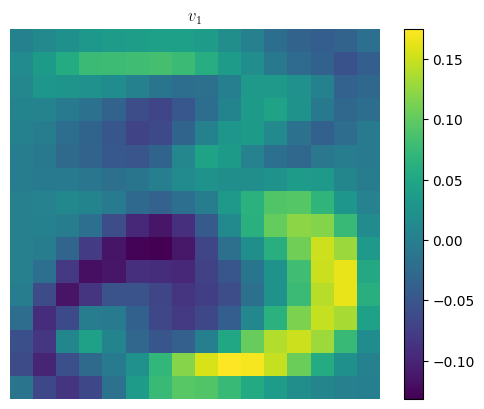

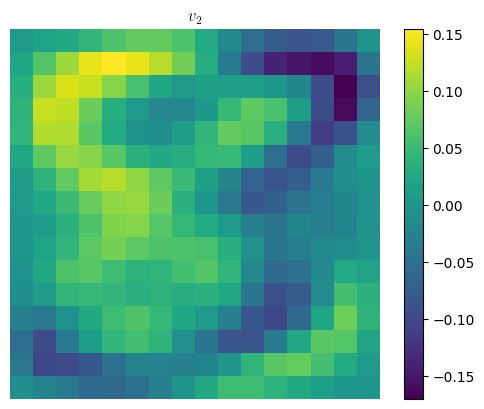

In [99]:
# part (d)
w, v = np.linalg.eig(S)
ind = w.argsort()[-2:][::-1]

v1 = v[:, 0]
v2 = v[:, 1]
print("The two largest eigenvalues: \n%s" %np.round(w[ind], 3))
# [237155.246 145188.353]

visualization_savefig(v1.reshape((16, 16), order='F'), "fig4a_v1.pdf", "$v_1$")
visualization_savefig(v2.reshape((16, 16), order='F'), "fig4b_v2.pdf", "$v_2$")

In [100]:
# part (e)
V = np.hstack((v1.reshape(-1, 1), v2.reshape(-1, 1)))
x_projected = np.matmul(x_centered, V)
coord_first_three = x_projected[0]
coord_first_eight = x_projected[200]
print("Resulting two coordinates for the first line in three.txt: \n%s" %np.round(coord_first_three, 3))
print("Resulting two coordinates for the first line in eight.txt: \n%s" %np.round(coord_first_eight, 3))


Resulting two coordinates for the first line in three.txt: 
[ 136.209 -242.628]
Resulting two coordinates for the first line in eight.txt: 
[-312.687  649.573]


In [101]:
# part (f)
cumsum = 0
for i in range(n):
    ele = np.linalg.norm(np.matmul(x_centered[i, :], np.matmul(V, V.transpose())) - x_centered[i, :]) ** 2
    cumsum += ele
ave_rec_err = cumsum / n
print(f"Average reconstruction error: {np.round(ave_rec_err, 3)}")

Average reconstruction error: 1405766.851


/var/folders/sl/tj9x552d27vft1rr9h0v5s4m0000gn/T/ipykernel_2586/2127666592.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig7.show()


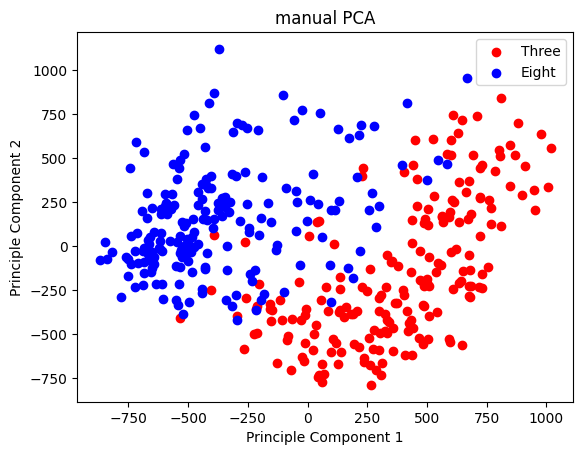

In [102]:
# part (g)
fig7, ax7 = plt.subplots()
ax7.scatter(x_projected[0:200, 0], x_projected[0:200, 1], color='red')
ax7.scatter(x_projected[200:400, 0], x_projected[200:400, 1], color='blue')
ax7.legend(("Three", "Eight"))
ax7.set_title("manual PCA")
ax7.set_xlabel('Principle Component 1')
ax7.set_ylabel('Principle Component 2')
fig7.savefig("fig7_2d_point_cloud.pdf")
fig7.show()

# shorcut: PCA with sklearn

/var/folders/sl/tj9x552d27vft1rr9h0v5s4m0000gn/T/ipykernel_2586/3166241456.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_pca.show()


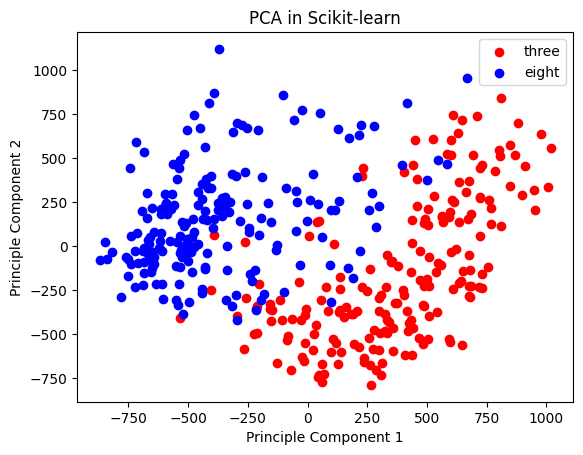

In [103]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

fig_pca, ax_pca = plt.subplots()
ax_pca.scatter(x_pca[0:200, 0], x_pca[0:200, 1], color='red', label='three')
ax_pca.scatter(x_pca[200:400, 0], x_pca[200:400, 1], color='blue', label='eight')
ax_pca.legend()
ax_pca.set_title("PCA in Scikit-learn")
ax_pca.set_xlabel('Principle Component 1')
ax_pca.set_ylabel('Principle Component 2')
fig_pca.savefig("fig8_2d_point_cloud_sklearn.pdf")
fig_pca.show()

# PCA tutorial: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#covariance-matrix